In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.arima_model import ARMA,ARIMA,ARMAResults,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from pmdarima import auto_arima

In [2]:
df = pd.read_excel('prepdata.xlsx',index_col=0,parse_dates=True)
df.dropna(axis='columns',inplace=True)

In [3]:
df1 = df[['PVMPGDM1 Index','PVMPGDM4 Index']]
df1.index.freq = 'B'
price_index = 'PVMPGDM4 Index'

In [6]:
#Optimize ARIMA parameters
aicVal=[]
for ari in range(0,11):
    for maj in range(0,11):
        try:
            arima_obj = ARIMA(df1[price_index].tolist(),order=(ari,0,maj))
            arima_obj_fit=arima_obj.fit()
            aicVal.append([ari,0,maj,arima_obj_fit.aic])
        except ValueError:
            pass

C:\Users\Lenovo\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Lenovo\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Lenovo\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Lenovo\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Lenovo\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:492: HessianInversi

In [ ]:
aicVal

In [7]:
AIC = []
for i,j,k,x in aicVal:
    AIC.append(x)

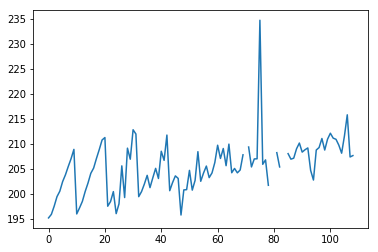

In [8]:
plt.plot(AIC[5:])